<a href="https://colab.research.google.com/github/mowne67/Portfolio-Mowne/blob/main/Bank_Marketing_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Term Deposit Marketing Classification
## Overview:
The data is related to direct marketing campaigns (phone calls) of a Portuguese banking
institution. The classification goal is to predict if the client will subscribe to a term
deposit.

Exploratory Data Analysis with Correlation Matrix is performed.

Multiple Machine Learning Models are being deployed and their acuuracies and recall scores are being compared.


In [4]:
!pip install dython

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

## Dataset:

Link: https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

This dataset contains 4 files.:

1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date
(from May 2008 to November 2010)

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and
20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this
dataset with fewer inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older
version of this dataset with fewer inputs).

We are using the first dataset with 20 inputs.

In [6]:
df = pd.read_csv('bank-additional-full.csv', delimiter = ';')

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.shape

(41188, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

From the output below, it is very obvious that there is a class imbalance in this dataset.

(array([36548.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4640.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

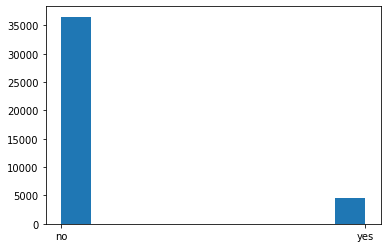

In [10]:
plt.hist(df.y)

In [11]:
len(df)

41188

We change the target variable into integer values 0 and 1 for easier classification

In [12]:
a,b=[],[]
for i in range(len(df)):
  if df.y[i]=='yes':
    a.append(df.duration[i])
  if df.y[i]=='no':
    b.append(df.duration[i])

There is a strong correlation between Duration of the call and the target variable.

In [13]:
print(np.mean(a), np.mean(b))

553.1911637931034 220.84480682937507


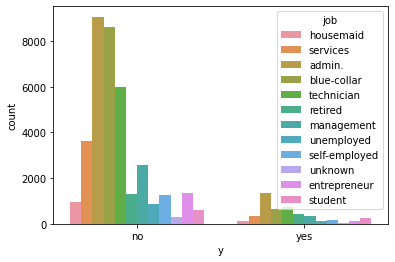

In [14]:
sns.countplot(x='y', hue='job', data=df)

In [15]:
df1=df.copy()

In [16]:
for i in range(len(df)):
  if df.y[i]=='yes':
    df1.y[i]=1
  else:
    df1.y[i]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df1.y = pd.to_numeric(df1.y)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Correlation Matrix, Heat Map:

The usual correlation mmatrix does not include the categorical/object variables. 

The python library 'Dython' has the tool that is needed, a correlation matrix which includes objects with using one hot encoding internally within the library.

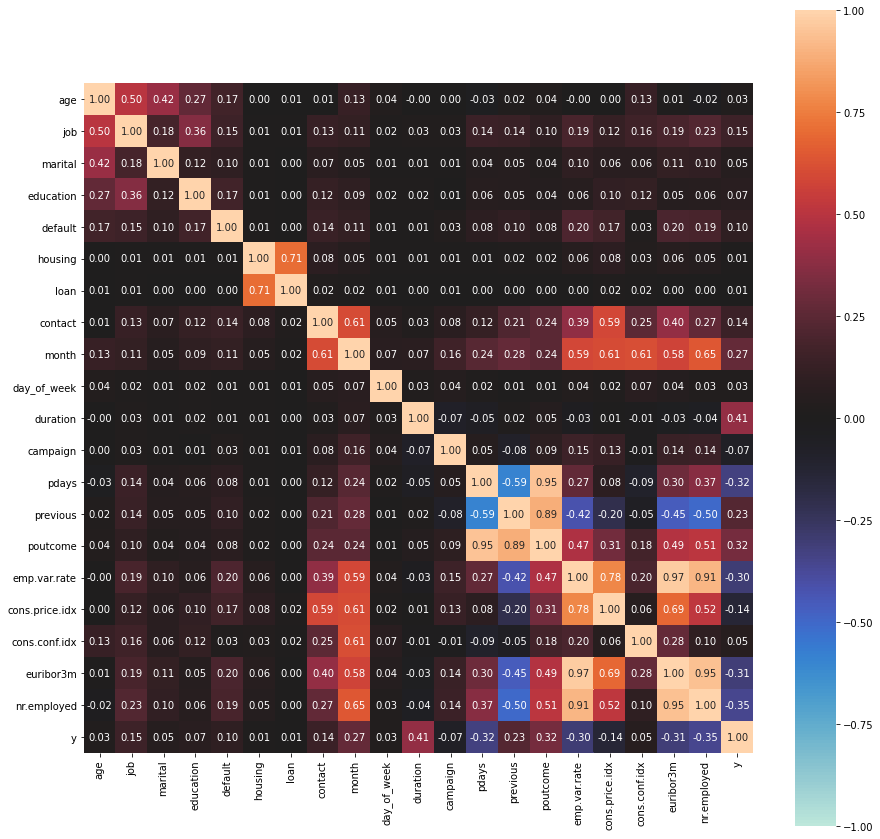

In [19]:
cat_corr=associations(df1,figsize=(15,15))

In [20]:
cat_corr['corr']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.504788,0.418870,0.268502,0.165022,0.001951,0.007368,0.007021,0.126287,0.037857,-0.000866,0.004594,-0.034369,0.024365,0.035627,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.504788,1.000000,0.183590,0.359526,0.152101,0.010630,0.010218,0.127856,0.109835,0.016458,0.028731,0.029969,0.141169,0.135284,0.099560,0.193545,0.123262,0.158268,0.194952,0.225935,0.152768
marital,0.418870,0.183590,1.000000,0.116240,0.095434,0.009170,0.000000,0.071993,0.050174,0.010888,0.013022,0.013109,0.042680,0.050257,0.036630,0.100112,0.063942,0.063387,0.110147,0.102835,0.054570
education,0.268502,0.359526,0.116240,1.000000,0.170355,0.013316,0.000000,0.123302,0.094718,0.019725,0.018073,0.007395,0.056312,0.049723,0.042282,0.060942,0.104704,0.116262,0.053005,0.057341,0.068472
default,0.165022,0.152101,0.095434,0.170355,1.000000,0.010573,0.001567,0.135554,0.111926,0.011314,0.012682,0.033209,0.080073,0.102630,0.076628,0.203288,0.168339,0.026752,0.195347,0.189849,0.099354
housing,0.001951,0.010630,0.009170,0.013316,0.010573,1.000000,0.707852,0.084603,0.054243,0.014635,0.009138,0.011022,0.010723,0.021688,0.016958,0.060247,0.081972,0.034532,0.059318,0.045896,0.011748
loan,0.007368,0.010218,0.000000,0.000000,0.001567,0.707852,1.000000,0.024206,0.019830,0.006104,0.004901,0.005295,0.002034,0.004220,0.000000,0.003451,0.017070,0.015072,0.002889,0.004318,0.005154
contact,0.007021,0.127856,0.071993,0.123302,0.135554,0.084603,0.024206,1.000000,0.609087,0.054906,0.026657,0.077368,0.117970,0.212848,0.242419,0.393584,0.591474,0.251614,0.399773,0.269155,0.144773
month,0.126287,0.109835,0.050174,0.094718,0.111926,0.054243,0.019830,0.609087,1.000000,0.066569,0.071253,0.160763,0.240266,0.280649,0.242400,0.588172,0.608363,0.612346,0.578118,0.648327,0.274395
day_of_week,0.037857,0.016458,0.010888,0.019725,0.011314,0.014635,0.006104,0.054906,0.066569,1.000000,0.029363,0.040305,0.015854,0.005755,0.014579,0.035267,0.019109,0.066660,0.043796,0.029925,0.025195


In [21]:
unw_cols=['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous',
          'poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
correlations=cat_corr['corr'].drop(unw_cols)

In [22]:
correlations

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
y,0.030399,0.152768,0.05457,0.068472,0.099354,0.011748,0.005154,0.144773,0.274395,0.025195,0.405274,-0.066357,-0.324914,0.230181,0.320488,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,1.0


These are the correlation coefficients of all the variables in the dataframe. The variables which have this value greater than 0.1 are being considered and other variables are dropped.

In [23]:
c=[]
v=[]
for i in unw_cols:
  if abs(correlations[i]['y'])>0.1:
    c.append(i)
    v.append(correlations[i]['y'])

In [24]:
v

[0.15276755102517953,
 0.1447730557120007,
 0.27439487093066833,
 0.40527380067931484,
 -0.3249144776166327,
 0.2301810032165918,
 0.32048796034156984,
 -0.29833442615937866,
 -0.1362112128192462,
 -0.3077714039407208,
 -0.35467829592143624]

The final 12 variables that are to taken into training and testing are,

In [25]:
c

['job',
 'contact',
 'month',
 'duration',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'euribor3m',
 'nr.employed']

In [26]:
finaldf=df1.copy()
for i in unw_cols:
  if i not in c:
    finaldf = finaldf.drop(columns=i)

In [27]:
finaldf

,job,contact,month,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
0,housemaid,telephone,may,261,999,0,nonexistent,1.1,93.994,4.857,5191.0,0
1,services,telephone,may,149,999,0,nonexistent,1.1,93.994,4.857,5191.0,0
2,services,telephone,may,226,999,0,nonexistent,1.1,93.994,4.857,5191.0,0
3,admin.,telephone,may,151,999,0,nonexistent,1.1,93.994,4.857,5191.0,0
4,services,telephone,may,307,999,0,nonexistent,1.1,93.994,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,cellular,nov,334,999,0,nonexistent,-1.1,94.767,1.028,4963.6,1
41184,blue-collar,cellular,nov,383,999,0,nonexistent,-1.1,94.767,1.028,4963.6,0
41185,retired,cellular,nov,189,999,0,nonexistent,-1.1,94.767,1.028,4963.6,0
41186,technician,cellular,nov,442,999,0,nonexistent,-1.1,94.767,1.028,4963.6,1


## Training and Testing

In [28]:
fdf=pd.get_dummies(finaldf)

In [29]:
X=fdf.drop(columns= 'y')
Y=fdf.y

In [30]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state = 42)

As previously mentioned, the class imbalance has to be taken into account.
We use 'imblearn' library which is created for issues caused by class imbalance.

Synthetic Minority class rows are upsampled into the dataset for this purpose. It is done by calling SMOTE method from imblearn class. This increases the size of the training dataset by 60%.


In [31]:
sm = SMOTE(random_state=42, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Evalutaion of Models:

In a dataset with imbalanced target classes, the model tends to have high accuracy even if it is not predicting the minority class correctly. 

Accuracy is not a right measure here. So, Recall score is calculated for a better evaluation of the different models.

The models used here are:
1. Logistic Regression
2. K-Nearest Neighbour
3. Linear Support Vector Machine
4. Random Forest Classifier

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("score on test: " + str(lr.score(X_test, y_test)))
print("score on train: "+ str(lr.score(X_train, y_train)))
lrpred=lr.predict(X_test)
print('recall score: '+ str(recall_score(y_test,lrpred)))

score on test: 0.8600388443797038
score on train: 0.871704564882886
recall score: 0.879144385026738


### K-Nearest Neighbour

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(X_train, y_train)
print("train shape: " + str(X_train.shape))
print("score on test: " + str(knn.score(X_test, y_test)))
print("score on train: "+ str(knn.score(X_train, y_train)))
knnpred=knn.predict(X_test)
print('recall score: '+ str(recall_score(y_test,knnpred)))

train shape: (58490, 34)
score on test: 0.8480213644088371
score on train: 0.9339716190801847
recall score: 0.8310160427807487


### Linear Support Vector Machine

In [34]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(X_train, y_train)
print("score on test: " + str(svm.score(X_test, y_test)))
print("score on train: "+ str(svm.score(X_train, y_train)))
svmpred=svm.predict(X_test)
print('recall score: '+ str(recall_score(y_test,svmpred)))

score on test: 0.9054382131585337
score on train: 0.78871601983245
recall score: 0.651336898395722


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
print("score on test: " + str(rf.score(X_test, y_test)))
print("score on train: "+ str(rf.score(X_train, y_train)))
rfpred=rf.predict(X_test)
print('recall score: '+ str(recall_score(y_test,rfpred)))

score on test: 0.8790968681718864
score on train: 0.9295948025303471
recall score: 0.7636363636363637


## Conclusion:

Decent Recall scores are produced from all models but Logistic Regression and K-Nearest Neighbour models have very good balance of good accuracy with a good recall score. 

The Predictions from all models:

In [ ]:
lrpred, svmpred, knnpred, rfpred